# Generate MQXF Magnet with STEAM-SIGMA
<img src = "MQXF_1ep.png" width=50%>

# Import Java gateway and STEAM API (SIGMA, UTILS)

In [1]:
from py4j.java_gateway import launch_gateway, java_import, JavaGateway, JavaObject, GatewayParameters, Py4JNetworkError

# Launch a Gateway in a new Java process, this returns port
port = launch_gateway(classpath='../../steam/*')

# JavaGateway instance is connected to a Gateway instance on the Java side
gateway = JavaGateway(gateway_parameters=GatewayParameters(port=port))

import numpy as np
import math
import pandas as pd
import matplotlib.patches as patches
import matplotlib.lines as lines
import matplotlib.pyplot as plt
%matplotlib inline

Point = gateway.jvm.model.geometry.basic.Point
Line = gateway.jvm.model.geometry.basic.Line
Arc = gateway.jvm.model.geometry.basic.Arc
Circumference = gateway.jvm.model.geometry.basic.Circumference
Area = gateway.jvm.model.geometry.basic.Area
HyperLine = gateway.jvm.model.geometry.basic.HyperLine
Element = gateway.jvm.model.geometry.Element
Domain = gateway.jvm.model.domains.Domain
AirDomain = gateway.jvm.model.domains.database.AirDomain
AirFarFieldDomain = gateway.jvm.model.domains.database.AirFarFieldDomain
IronDomain = gateway.jvm.model.domains.database.IronDomain
HoleDomain = gateway.jvm.model.domains.database.HoleDomain
CoilDomain = gateway.jvm.model.domains.database.CoilDomain
MatDatabase = gateway.jvm.model.materials.database.MatDatabase
CriticalSurfaceFitEnum = gateway.jvm.model.geometry.database.Cable.CriticalSurfaceFitEnum
ResitivityCopperFitEnum = gateway.jvm.model.geometry.database.Cable.ResitivityCopperFitEnum
ConfigSigma = gateway.jvm.config.ConfigSigma
TxtSigmaServer = gateway.jvm.server.TxtSigmaServer
MagnetMPHBuilder = gateway.jvm.comsol.MagnetMPHBuilder
Cable = gateway.jvm.model.geometry.coil.Cable
Winding = gateway.jvm.model.geometry.coil.Winding
Pole = gateway.jvm.model.geometry.coil.Pole
Coil = gateway.jvm.model.geometry.coil.Coil

In [2]:
import sys
import os
from pathlib import Path

curr_dir = Path(os.path.split(os.getcwd())[0])
utilities_dir = str(curr_dir.parent / 'steam')

if utilities_dir not in sys.path:
    sys.path.append(utilities_dir)
    
import plotting as p
import arrays as a

(-1.05, 1.05)

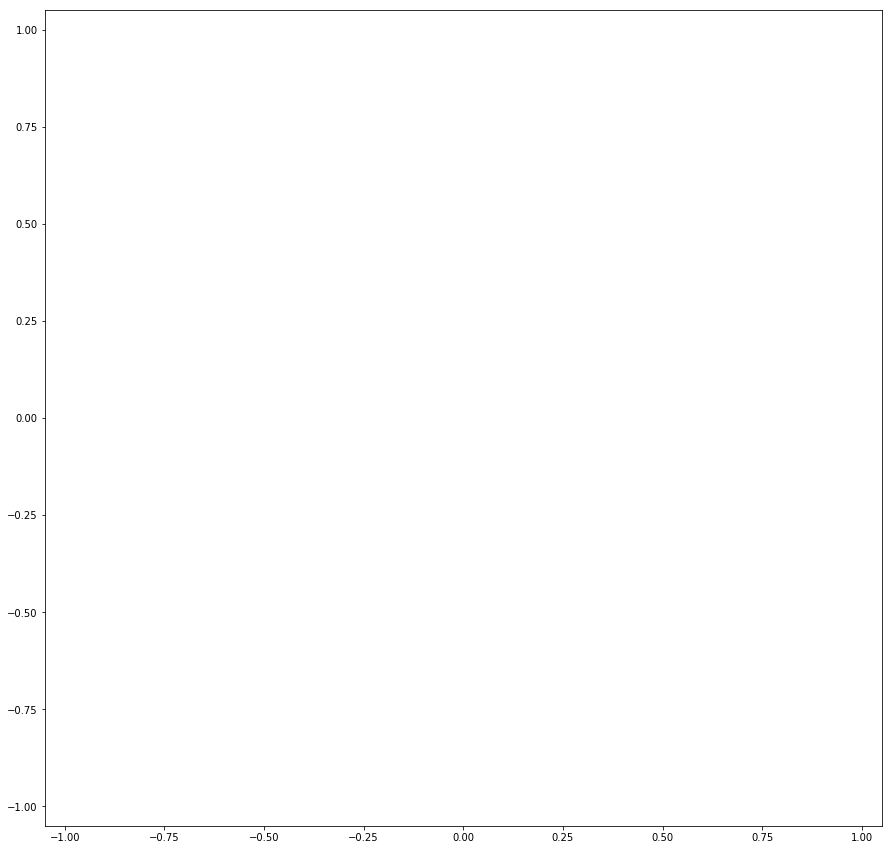

In [3]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

In [4]:
# General variables
mm = 0.001
deg = np.pi/180
DCONT = 0.0
shrink = 1.0 * (1 - DCONT)
DCCONT = 0.0
cshrink = 1.0 * (1 - DCCONT)
DCSCONT = 0.0
csshrink = 1.0 * (1 - DCSCONT)
BEAMD = 97.00
beamd = BEAMD * mm
pi = 3.14159265
deg2r = pi/180
wkeypole = 15 * mm
dshellth = 0 * mm
dvesselth = 0 * mm
dpadth = 0 * mm
dkeyy = 0 * mm
dkeyh = 0 * mm
deng = 0 * mm
dbusdeg = 0
dtooldeg = 0
dblady = 0 * mm
dbladh = 0 * mm
dhcorner = 0 * mm
r1 = 75 * mm
r21 = 93.813 * mm
r22 = 94.313 * mm
r3 = 113.126 * mm
collarin = 115 * mm
padin = 133 * mm
collarth = padin - collarin
fillth = collarin - r3
padsep = 40 * mm
eng = 33 * mm + deng
hcorner = 60 * mm + dhcorner
rcoltie = 9 * mm/2
xcoltie = 118 * mm
ycoltie = 45 * mm
identd = 4 * mm
identw = 12 * mm
padth = 41.5 * mm + dpadth
padout = padin + padth
colpadth = collarth + padth
rpadtie = 16 * mm/2
xpadtie = 140 * mm
ypadtie = 82 * mm
rrod = 36 * mm/2
rhole = 40 * mm/2
rwash = 28 * mm
xhole = 155 * mm * math.sqrt(2)/2
yhole = 155 * mm * math.sqrt(2)/2
alkeyh = 12 * mm
keyy = 24.5 * mm + dkeyy - dkeyh
keyh = 13.5 * mm + dkeyh
blady = keyy + keyh + 4 * mm - dkeyy - dbladh + dblady
bladh = 58 * mm + dbladh
padcut = 6 * mm
slot = 3 * mm
mastersep = 3 * mm
slotb = 3 * mm
slota = 5 * mm
sloti = 5 * mm
pmasterth = 15 * mm
pmastery = blady + bladh + pmasterth - dblady + 1 * mm
outerd = 630 * mm
vesselout = outerd/2
vesselth = 8 * mm + dvesselth
vesselin = vesselout - vesselth
vesselgap = 0 * mm
shellout = vesselin - vesselgap
shellth = 29 * mm + dshellth
shellin = shellout - shellth
ymasterth = pmasterth
ymastery = pmastery
yokein = padout + mastersep
yokeout = shellin
yokesep = 12 * mm
grwidth = 9.5 * mm
grdepth = 3 * mm
ryoketie = 24 * mm/2
xyoketie = 226 * mm
yyoketie = 78 * mm
ryokecool = 77 * mm/2
xyokecool = 227.5 * mm * math.sqrt(2)/2
yyokecool = 227.5 * mm * math.sqrt(2)/2
busdeg = 30 + dbusdeg
busw = 20 * mm
bush = 50 * mm
tooldeg = 17 + dtooldeg
toolcut = 20 * mm
rcryo1 = 0.445
rcryo2 = 0.457
rvessel1 = vesselin
rvessel2 = vesselout
off = 0.080
slot_sep = 24 * mm
slot_h = 15 * mm
slot_w = 10 * mm
slot_hcut = 0 * mm
slot_wcut = 2 * mm
rfillet = 15 * mm
xpin = yokeout
ypin = 0 * mm
dpin = 8 * mm
rpin = dpin/2
midp = (padout + pmastery)/2
dist = math.sqrt((xyokecool - midp) * (xyokecool - midp) + (yyokecool - midp) * (yyokecool - midp))
ang = math.acos(dist/ryokecool) + 5/4 * pi
distfill = 0.0062132034356
midp2 = (padin + hcorner)/2

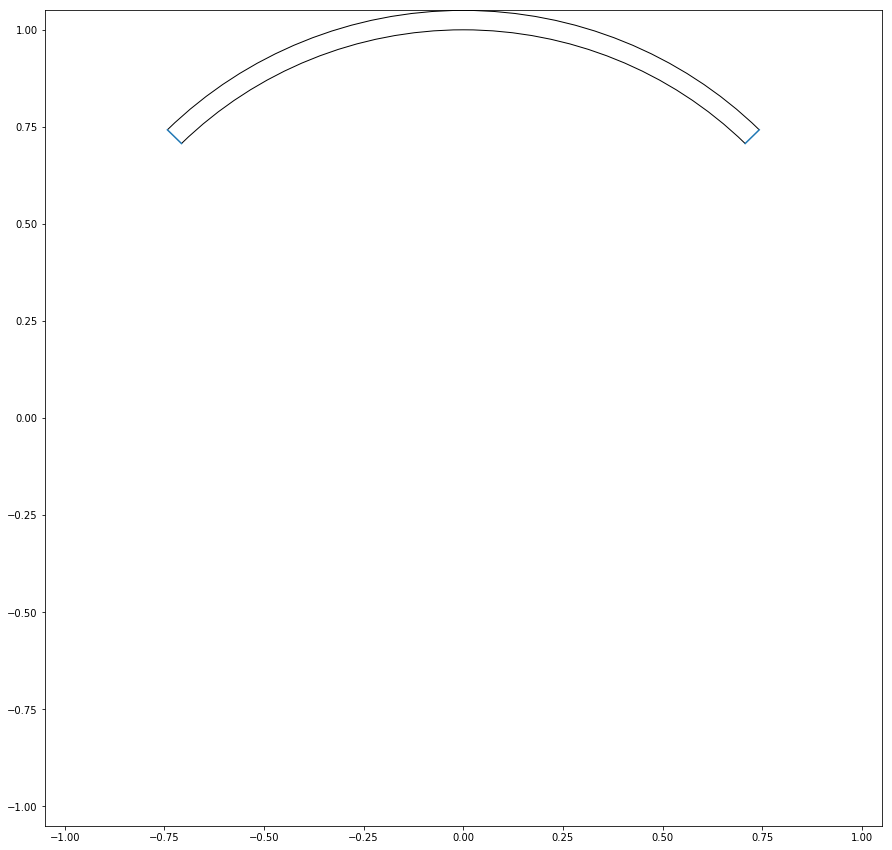

In [5]:
#Air far field
r = 1

kpc = Point.ofCartesian(0.0, 0.0)
kp1 = Point.ofCartesian(r*np.sqrt(2)/2, r*np.sqrt(2)/2)
kp2 = Point.ofCartesian(-r*np.sqrt(2)/2, r*np.sqrt(2)/2)

kp1_far = Point.ofCartesian(kp1.getX()*1.05, kp1.getY()*1.05)
kp2_far = Point.ofCartesian(kp2.getX()*1.05, kp2.getY()*1.05)

ln1_far = Line.ofEndPoints(kp1, kp1_far)
ln2_far = Arc.ofEndPointsCenter(kp1_far, kp2_far,kpc)
ln3_far = Line.ofEndPoints(kp2_far, kp2)
ln4_far = Arc.ofEndPointsCenter(kp1, kp2, kpc) # changed w.r.t. COMSOL!!!!!!!!!

ar1_far = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1_far, ln2_far, ln3_far, ln4_far)))

el1_far = Element("FAR_El1", ar1_far)

air_far_field = a.create_element_array(gateway, (el1_far))

p.plot_multiple_areas(ax, [ar1_far])
fig

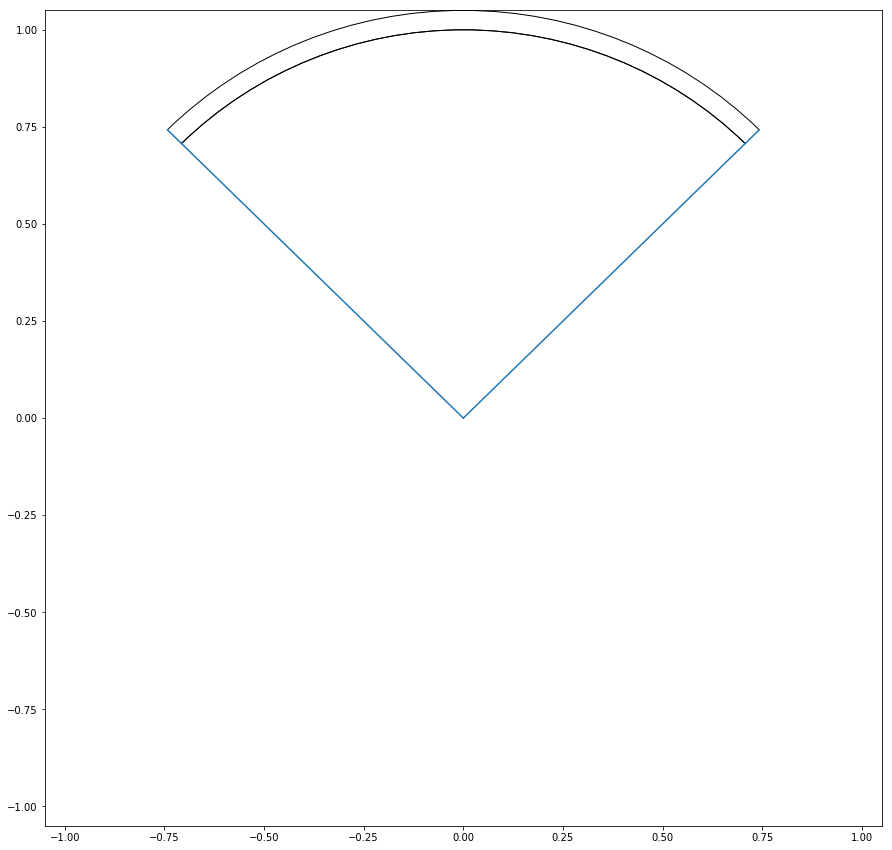

In [6]:
# Air domain
r = 1.0

kpc = Point.ofCartesian(0.0, 0.0)
kp1 = Point.ofCartesian(r*np.sqrt(2)/2, r*np.sqrt(2)/2)
kp2 = Point.ofCartesian(-r*np.sqrt(2)/2, r*np.sqrt(2)/2)

ln1 = Line.ofEndPoints(kpc, kp1)
ln2 = Arc.ofEndPointsCenter(kp1, kp2, kpc)
ln3 = Line.ofEndPoints(kp2, kpc)

ar1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln1, ln2, ln3)))

el1 = Element("AIR_El1",ar1)

air = a.create_element_array(gateway, (el1))

p.plot_multiple_areas(ax, [ar1])
fig

In [7]:
# cable parameters
wBare = 1.8363e-2
dstrand = 0.85e-3
lTpStrand = 0.135

Cable_MQXF = Cable()
Cable_MQXF.setLabel("cable_MQXF")
Cable_MQXF.setwInsulNarrow(1.45e-4)
Cable_MQXF.setwInsulWide(1.45e-4)
Cable_MQXF.setdFilament(56.0e-6)
Cable_MQXF.setDstrand(dstrand)
Cable_MQXF.setFracCu(1.15/(1+1.15))
Cable_MQXF.setFracSc(1/(1+1.15))
Cable_MQXF.setRRR(140.0)
Cable_MQXF.setTupRRR(295.0)
Cable_MQXF.setTop(1.9)
Cable_MQXF.setRc(15e-6)
Cable_MQXF.setRa(15e-6)
Cable_MQXF.setfRhoEff(1.5)
Cable_MQXF.setlTp(19e-3)
Cable_MQXF.setwBare(wBare)
Cable_MQXF.sethInBare(1.53e-3)
Cable_MQXF.sethOutBare(1.658e-3)
Cable_MQXF.setNoOfStrands(40)
Cable_MQXF.setNoOfStrandsPerLayer(20)
Cable_MQXF.setNoOfLayers(2)
Cable_MQXF.setlTpStrand(0.135)
Cable_MQXF.setwCore(12e-3)
Cable_MQXF.sethCore(25e-6)
Cable_MQXF.setThetaTpStrand(math.atan2((wBare-dstrand),(lTpStrand/2)))
Cable_MQXF.setC1(0.0)
Cable_MQXF.setC2(0.0)
Cable_MQXF.setFracHe(0.0)
Cable_MQXF.setFracFillInnerVoids(1.0)
Cable_MQXF.setFractFillOuterVoids(1.0)
Cable_MQXF.setCriticalSurfaceFit(Cable.CriticalSurfaceFitEnum.Ic_Nb3Sn_NIST)
Cable_MQXF.setInsulationMaterial(MatDatabase.MAT_GLASSFIBER)
Cable_MQXF.setMaterialInnerVoids(MatDatabase.MAT_GLASSFIBER)
Cable_MQXF.setMaterialOuterVoids(MatDatabase.MAT_GLASSFIBER)
Cable_MQXF.setMaterialCore(MatDatabase.MAT_STEEL)
Cable_MQXF.setResitivityCopperFit(Cable.ResitivityCopperFitEnum.rho_Cu_CUDI)

JavaObject id=o119

## Coil

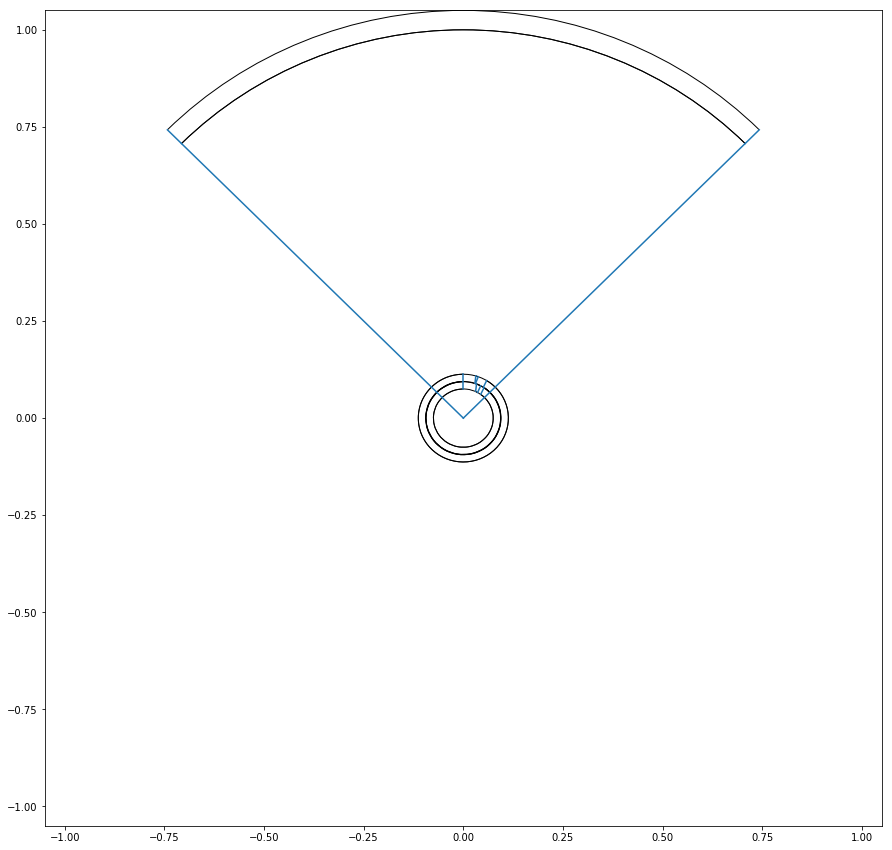

In [8]:
kp11 = Point.ofCartesian(90.1696e-3, 29.2393e-3)
kp12 = Point.ofCartesian(94.3082e-3, 0.3750e-3)
kp13 = Point.ofCartesian(112.9613e-3, 0.3750e-3)
kp14 = Point.ofCartesian(108.7068e-3, 31.3153e-3)

kp21 = Point.ofCartesian(79.9152e-3, 50.4593e-3)
kp22 = Point.ofCartesian(89.2050e-3, 30.7168e-3)
kp23 = Point.ofCartesian(106.6419e-3, 37.3421e-3)
kp24 = Point.ofCartesian(96.7375e-3, 58.5183e-3)

kp31 = Point.ofCartesian(69.3076e-3, 30.9361e-3)
kp32 = Point.ofCartesian(74.9936e-3, 0.3750e-3)
kp33 = Point.ofCartesian(93.6467e-3, 0.3750e-3)
kp34 = Point.ofCartesian(87.8299e-3, 33.1413e-3)

kp41 = Point.ofCartesian(61.3600e-3, 43.6988e-3)
kp42 = Point.ofCartesian(65.8958e-3, 35.7799e-3)
kp43 = Point.ofCartesian(82.9363e-3, 43.3669e-3)
kp44 = Point.ofCartesian(78.1257e-3, 51.8749e-3)

kp0 = Point.ofCartesian(0.0, 0.0)

ln11 = Arc.ofEndPointsCenter(kp12, kp11, kp0)
ln12 = Line.ofEndPoints(kp12, kp13)
ln13 = Arc.ofEndPointsCenter(kp13, kp14, kp0)
ln14 = Line.ofEndPoints(kp11, kp14)

ln21 = Arc.ofEndPointsCenter(kp22, kp21, kp0)
ln22 = Line.ofEndPoints(kp22, kp23)
ln23 = Arc.ofEndPointsCenter(kp23, kp24, kp0)
ln24 = Line.ofEndPoints(kp21, kp24)

ln31 = Arc.ofEndPointsCenter(kp32, kp31, kp0)
ln32 = Line.ofEndPoints(kp32, kp33)
ln33 = Arc.ofEndPointsCenter(kp33, kp34, kp0)
ln34 = Line.ofEndPoints(kp31, kp34)

ln41 = Arc.ofEndPointsCenter(kp42, kp41, kp0)
ln42 = Line.ofEndPoints(kp42, kp43)
ln43 = Arc.ofEndPointsCenter(kp43, kp44, kp0)
ln44 = Line.ofEndPoints(kp41, kp44)

ha11p  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln11, ln12, ln13, ln14)))
ha12p  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln21, ln22, ln23, ln24)))
ha13p  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln31, ln32, ln33, ln34)))
ha14p  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (ln41, ln42, ln43, ln44)))

ha11n = ha11p.mirrorY().rotate(-np.pi/2)
ha12n = ha12p.mirrorY().rotate(-np.pi/2)
ha13n = ha13p.mirrorY().rotate(-np.pi/2)
ha14n = ha14p.mirrorY().rotate(-np.pi/2)

w11_R = Winding.ofAreas(a.create_area_array(gateway, (ha11n)), a.create_int_array(gateway, (-1)), 16, 16, Cable_MQXF)
w12_R = Winding.ofAreas(a.create_area_array(gateway, (ha12n)), a.create_int_array(gateway, (-1)), 12, 12, Cable_MQXF)
w13_R = Winding.ofAreas(a.create_area_array(gateway, (ha13n)), a.create_int_array(gateway, (-1)), 17, 17, Cable_MQXF)
w14_R = Winding.ofAreas(a.create_area_array(gateway, (ha14n)), a.create_int_array(gateway, (-1)), 5, 5, Cable_MQXF)

w21_R = w11_R.mirrorY()
w22_R = w12_R.mirrorY()
w23_R = w13_R.mirrorY()
w24_R = w14_R.mirrorY()

w11_R = w11_R.reverseWindingDirection()
w12_R = w12_R.reverseWindingDirection()
w23_R = w23_R.reverseWindingDirection()
w24_R = w24_R.reverseWindingDirection()

p1 = Pole.ofWindings(a.create_winding_array(gateway, (w11_R, w12_R, w13_R, w14_R)))
p2 = Pole.ofWindings(a.create_winding_array(gateway, (w21_R, w22_R, w23_R, w24_R)))

coil = Coil.ofPoles(a.create_pole_array(gateway, (p1, p2)))

p.plot_multiple_areas(ax, [ha11n, ha12n, ha13n, ha14n])
fig

In [9]:
# iron yoke
kppident1 = Point.ofCartesian(padin-identd, 0.0)
kppident2 = Point.ofCartesian(padin-identd, identw/2)
kppident3 = Point.ofCartesian(padin, identw/2)
kppcor = Point.ofCartesian(padin, hcorner)
kppfllt1 = Point.ofCartesian(padin, hcorner-distfill)
kppfllt2 = Point.ofCartesian(padin-distfill/np.sqrt(2.0), hcorner+distfill/np.sqrt(2.0))
kppalkey1 = Point.ofCartesian(padout-slota, 0.0)
kppalkey2 = Point.ofCartesian(padout-slota, alkeyh/2)
kppalkey3 = Point.ofCartesian(padout, alkeyh/2)
kppkey1 = Point.ofCartesian(padout, keyy)
kppkey2 = Point.ofCartesian(padout-sloti, keyy)
kppkey3 = Point.ofCartesian(padout-sloti, keyy+keyh)
kppkey4 = Point.ofCartesian(padout, keyy+keyh)
kppblad1 = Point.ofCartesian(padout, blady)
kppblad2 = Point.ofCartesian(padout-slotb, blady)
kppblad3 = Point.ofCartesian(padout-slotb, blady+bladh)
kppblad4 = Point.ofCartesian(padout, blady+bladh)
kppmtop = Point.ofCartesian(padout, pmastery)

kppeng1 = Point.ofCartesian(midp2+padsep/2/np.sqrt(2), midp2-padsep/2/np.sqrt(2))
kppcool1 = Point.ofCartesian(kppmtop.getX(), kppmtop.getY()+padcut)
kppcool2 = Point.ofCartesian(kppcool1.getY()-(kppeng1.getY()-kppeng1.getX()), kppcool1.getY())

kppident1s = Point.ofCartesian(kppident1.getY(), kppident1.getX())
kppident2s = Point.ofCartesian(kppident2.getY(), kppident2.getX())
kppident3s = Point.ofCartesian(kppident3.getY(), kppident3.getX())
kppcors = Point.ofCartesian(kppcor.getY(), kppcor.getX())
kppfllt1s = Point.ofCartesian(kppfllt1.getY(), kppfllt1.getX())
kppfllt2s = Point.ofCartesian(kppfllt2.getY(), kppfllt2.getX())
kppalkey1s = Point.ofCartesian(kppalkey1.getY(), kppalkey1.getX())
kppalkey2s = Point.ofCartesian(kppalkey2.getY(), kppalkey2.getX())
kppalkey3s = Point.ofCartesian(kppalkey3.getY(), kppalkey3.getX())
kppkey1s = Point.ofCartesian(kppkey1.getY(), kppkey1.getX())
kppkey2s = Point.ofCartesian(kppkey2.getY(), kppkey2.getX())
kppkey3s = Point.ofCartesian(kppkey3.getY(), kppkey3.getX())
kppkey4s = Point.ofCartesian(kppkey4.getY(), kppkey4.getX())
kppblad1s = Point.ofCartesian(kppblad1.getY(), kppblad1.getX())
kppblad2s = Point.ofCartesian(kppblad2.getY(), kppblad2.getX())
kppblad3s = Point.ofCartesian(kppblad3.getY(), kppblad3.getX())
kppblad4s = Point.ofCartesian(kppblad4.getY(), kppblad4.getX())
kppmtops = Point.ofCartesian(kppmtop.getY(), kppmtop.getX())
kppeng1s = Point.ofCartesian(kppeng1.getY(), kppeng1.getX())
kppcool1s = Point.ofCartesian(kppcool1.getY(), kppcool1.getX())
kppcool2s = Point.ofCartesian(kppcool2.getY(), kppcool2.getX())

kpyalkey1 = Point.ofCartesian(yokein+slota, 0.0)
kpyalkey2 = Point.ofCartesian(yokein+slota, alkeyh/2)
kpyalkey3 = Point.ofCartesian(yokein, alkeyh/2)
kpykey1 = Point.ofCartesian(yokein, keyy)
kpykey2 = Point.ofCartesian(yokein+sloti, keyy)
kpykey3 = Point.ofCartesian(yokein+sloti, keyy+keyh)
kpykey4 = Point.ofCartesian(yokein, keyy+keyh)
kpyblad1 = Point.ofCartesian(yokein, blady)
kpyblad2 = Point.ofCartesian(yokein+slotb, blady)
kpyblad3 = Point.ofCartesian(yokein+slotb, blady+bladh)
kpyblad4 = Point.ofCartesian(yokein, blady+bladh)
kpytool1 = Point.ofPolar(yokeout, (45-tooldeg)*deg2r)
kpytool2 = Point.ofCartesian(kpytool1.getX()-toolcut, kpytool1.getY())
kpytool3 = Point.ofCartesian(kpytool2.getX(), np.sqrt(yokeout*yokeout-kpytool2.getX()*kpytool2.getX()))
kpyout1 = Point.ofPolar(yokeout, 0.0)
kpyout2 = Point.ofPolar(yokeout,(pi/4-math.asin(yokesep/2/yokeout)))
kpysep1 = Point.ofCartesian(kpyout2.getX()-np.sqrt(0.5*grwidth*grwidth), kpyout2.getY()-np.sqrt(0.5*grwidth*grwidth))
kpysep2 = Point.ofCartesian(kpysep1.getX()-np.sqrt(0.5*grdepth*grdepth), kpysep1.getY()+np.sqrt(0.5*grdepth*grdepth))
kpycool1 = Point.ofCartesian(xyokecool+ryokecool*np.cos(-math.asin((yokesep/2-grdepth)/ryokecool)+pi/4), yyokecool+ryokecool*np.sin(-math.asin((yokesep/2-grdepth)/ryokecool)+pi/4))
kpycool2 = Point.ofCartesian(yokein, yyokecool-np.sqrt(ryokecool*ryokecool-(yokein-xyokecool)*(yokein-xyokecool)))
kpyslot1 = Point.ofPolar(yokeout,math.asin(slot_sep/2/yokeout))
kpyslot2 = Point.ofCartesian(kpyslot1.getX()-slot_w, kpyslot1.getY())
kpyslot3 = Point.ofCartesian(kpyslot1.getX()-slot_w, kpyslot1.getY()+slot_h)
kpyslot5 = Point.ofPolar(yokeout,math.asin((slot_sep/2+slot_h+slot_hcut)/yokeout))
kpyslot4 = Point.ofCartesian(kpyslot5.getX()-slot_wcut, kpyslot1.getY()+slot_h)
kpypin1 = Point.ofCartesian(yokeout-rpin, 0.0)
kpypin2 = Point.ofPolar(yokeout,2*math.asin(rpin/2/yokeout))

kpyalkey1s = Point.ofCartesian(kpyalkey1.getY(), kpyalkey1.getX())
kpyalkey2s = Point.ofCartesian(kpyalkey2.getY(), kpyalkey2.getX())
kpyalkey3s = Point.ofCartesian(kpyalkey3.getY(), kpyalkey3.getX())
kpykey1s = Point.ofCartesian(kpykey1.getY(), kpykey1.getX())
kpykey2s = Point.ofCartesian(kpykey2.getY(), kpykey2.getX())
kpykey3s = Point.ofCartesian(kpykey3.getY(), kpykey3.getX())
kpykey4s = Point.ofCartesian(kpykey4.getY(), kpykey4.getX())
kpyblad1s = Point.ofCartesian(kpyblad1.getY(), kpyblad1.getX())
kpyblad2s = Point.ofCartesian(kpyblad2.getY(), kpyblad2.getX())
kpyblad3s = Point.ofCartesian(kpyblad3.getY(), kpyblad3.getX())
kpyblad4s = Point.ofCartesian(kpyblad4.getY(), kpyblad4.getX())
kpytool1s = Point.ofCartesian(kpytool1.getY(), kpytool1.getX())
kpytool2s = Point.ofCartesian(kpytool2.getY(), kpytool2.getX())
kpytool3s = Point.ofCartesian(kpytool3.getY(), kpytool3.getX())
kpyout1s = Point.ofCartesian(kpyout1.getY(), kpyout1.getX())
kpyout2s = Point.ofCartesian(kpyout2.getY(), kpyout2.getX())
kpysep1s = Point.ofCartesian(kpysep1.getY(), kpysep1.getX())
kpysep2s = Point.ofCartesian(kpysep2.getY(), kpysep2.getX())
kpycool1s = Point.ofCartesian(kpycool1.getY(), kpycool1.getX())
kpycool2s = Point.ofCartesian(kpycool2.getY(), kpycool2.getX())
kpyslot1s = Point.ofCartesian(kpyslot1.getY(), kpyslot1.getX())
kpyslot2s = Point.ofCartesian(kpyslot2.getY(), kpyslot2.getX())
kpyslot3s = Point.ofCartesian(kpyslot3.getY(), kpyslot3.getX())
kpyslot4s = Point.ofCartesian(kpyslot4.getY(), kpyslot4.getX())
kpyslot5s = Point.ofCartesian(kpyslot5.getY(), kpyslot5.getX())
kpypin1s = Point.ofCartesian(kpypin1.getY(), kpypin1.getX())
kpypin2s = Point.ofCartesian(kpypin2.getY(), kpypin2.getX())

lnpmed = Line.ofEndPoints(kppident1,kppalkey1)
lnpalkey1 = Line.ofEndPoints(kppalkey1,kppalkey2)
lnpalkey2 = Line.ofEndPoints(kppalkey2,kppalkey3)
lnpm1 = Line.ofEndPoints(kppalkey3,kppkey1)
lnpkey1 = Line.ofEndPoints(kppkey1,kppkey2)
lnpkey2 = Line.ofEndPoints(kppkey2,kppkey3)
lnpkey3 = Line.ofEndPoints(kppkey3,kppkey4)
lnpm2 = Line.ofEndPoints(kppkey4,kppblad1)
lnpblad1 = Line.ofEndPoints(kppblad1,kppblad2)
lnpblad2 = Line.ofEndPoints(kppblad2,kppblad3)
lnpblad3 = Line.ofEndPoints(kppblad3,kppblad4)
lnpm3 = Line.ofEndPoints(kppblad4,kppmtop)
lnpm4 = Line.ofEndPoints(kppmtop,kppcool1)
lnpcool = Line.ofEndPoints(kppcool1,kppcool2)
lnpeng = Line.ofEndPoints(kppcool2,kppeng1)
lnpcol1 = Line.ofEndPoints(kppeng1,kppfllt2)
lnpfllt = Arc.ofEndPointsRadius(kppfllt2,kppfllt1,rfillet)
lnpcol2 = Line.ofEndPoints(kppfllt1,kppident3)
lnpident1 = Line.ofEndPoints(kppident3,kppident2)
lnpident2 = Line.ofEndPoints(kppident2,kppident1)

lnpmeds = Line.ofEndPoints(kppident1s,kppalkey1s)
lnpalkey1s = Line.ofEndPoints(kppalkey1s,kppalkey2s)
lnpalkey2s = Line.ofEndPoints(kppalkey2s,kppalkey3s)
lnpm1s = Line.ofEndPoints(kppalkey3s,kppkey1s)
lnpkey1s = Line.ofEndPoints(kppkey1s,kppkey2s)
lnpkey2s = Line.ofEndPoints(kppkey2s,kppkey3s)
lnpkey3s = Line.ofEndPoints(kppkey3s,kppkey4s)
lnpm2s = Line.ofEndPoints(kppkey4s,kppblad1s)
lnpblad1s = Line.ofEndPoints(kppblad1s,kppblad2s)
lnpblad2s = Line.ofEndPoints(kppblad2s,kppblad3s)
lnpblad3s = Line.ofEndPoints(kppblad3s,kppblad4s)
lnpm3s = Line.ofEndPoints(kppblad4s,kppmtops)
lnpm4s = Line.ofEndPoints(kppmtops,kppcool1s)
lnpcools = Line.ofEndPoints(kppcool1s,kppcool2s)
lnpengs = Line.ofEndPoints(kppcool2s,kppeng1s)
lnpcol1s = Line.ofEndPoints(kppeng1s,kppfllt2s)
lnpfllts = Arc.ofEndPointsRadius(kppfllt1s,kppfllt2s,rfillet)
lnpcol2s = Line.ofEndPoints(kppfllt1s,kppident3s)
lnpident1s = Line.ofEndPoints(kppident3s,kppident2s)
lnpident2s = Line.ofEndPoints(kppident2s,kppident1s)

lnymed = Line.ofEndPoints(kpyalkey1,kpypin1)
lnypin = Arc.ofEndPointsRadius(kpypin1,kpypin2,rpin)
lnyout1 = Arc.ofEndPointsRadius(kpyslot1,kpypin2,yokeout)
lnyslot1 = Line.ofEndPoints(kpyslot1,kpyslot2)
lnyslot2 = Line.ofEndPoints(kpyslot2,kpyslot3)
lnyslot3 = Line.ofEndPoints(kpyslot3,kpyslot4)
lnyslot4 = Line.ofEndPoints(kpyslot4,kpyslot5)
lnyout2 = Arc.ofEndPointsRadius(kpytool1,kpyslot5,yokeout)
lnytool1 = Line.ofEndPoints(kpytool1,kpytool2)
lnytool2 = Line.ofEndPoints(kpytool2,kpytool3)
lnyout3 = Arc.ofEndPointsRadius(kpyout2,kpytool3,yokeout)
lnysep1 = Line.ofEndPoints(kpyout2,kpysep1)
lnysep2 = Line.ofEndPoints(kpysep1,kpysep2)
lnysep3 = Line.ofEndPoints(kpysep2,kpycool1)
lnycool = Arc.ofEndPointsRadius(kpycool1,kpycool2,ryokecool)
lnym1 = Line.ofEndPoints(kpycool2,kpyblad4)
lnyblad1 = Line.ofEndPoints(kpyblad4,kpyblad3)
lnyblad2 = Line.ofEndPoints(kpyblad3,kpyblad2)
lnyblad3 = Line.ofEndPoints(kpyblad2,kpyblad1)
lnym2 = Line.ofEndPoints(kpyblad1,kpykey4)
lnykey1 = Line.ofEndPoints(kpykey4,kpykey3)
lnykey2 = Line.ofEndPoints(kpykey3,kpykey2)
lnykey3 = Line.ofEndPoints(kpykey2,kpykey1)
lnym3 = Line.ofEndPoints(kpykey1,kpyalkey3)
lnyalkey1 = Line.ofEndPoints(kpyalkey3,kpyalkey2)
lnyalkey2 = Line.ofEndPoints(kpyalkey2,kpyalkey1)

lnymeds = Line.ofEndPoints(kpyalkey1s,kpypin1s)
lnypins = Arc.ofEndPointsRadius(kpypin2s,kpypin1s,rpin)
lnyout1s = Arc.ofEndPointsRadius(kpypin2s,kpyslot1s,yokeout)
lnyslot1s = Line.ofEndPoints(kpyslot1s,kpyslot2s)
lnyslot2s = Line.ofEndPoints(kpyslot2s,kpyslot3s)
lnyslot3s = Line.ofEndPoints(kpyslot3s,kpyslot4s)
lnyslot4s = Line.ofEndPoints(kpyslot4s,kpyslot5s)
lnyout2s = Arc.ofEndPointsRadius(kpyslot5s,kpytool1s,yokeout)
lnytool1s = Line.ofEndPoints(kpytool1s,kpytool2s)
lnytool2s = Line.ofEndPoints(kpytool2s,kpytool3s)
lnyout3s = Arc.ofEndPointsRadius(kpytool3s,kpyout2s,yokeout)
lnysep1s = Line.ofEndPoints(kpyout2s,kpysep1s)
lnysep2s = Line.ofEndPoints(kpysep1s,kpysep2s)
lnysep3s = Line.ofEndPoints(kpysep2s,kpycool1s)
lnycools = Arc.ofEndPointsRadius(kpycool2s,kpycool1s,ryokecool)
lnym1s = Line.ofEndPoints(kpycool2s,kpyblad4s)
lnyblad1s = Line.ofEndPoints(kpyblad4s,kpyblad3s)
lnyblad2s = Line.ofEndPoints(kpyblad3s,kpyblad2s)
lnyblad3s = Line.ofEndPoints(kpyblad2s,kpyblad1s)
lnym2s = Line.ofEndPoints(kpyblad1s,kpykey4s)
lnykey1s = Line.ofEndPoints(kpykey4s,kpykey3s)
lnykey2s = Line.ofEndPoints(kpykey3s,kpykey2s)
lnykey3s = Line.ofEndPoints(kpykey2s,kpykey1s)
lnym3s = Line.ofEndPoints(kpykey1s,kpyalkey3s)
lnyalkey1s = Line.ofEndPoints(kpyalkey3s,kpyalkey2s)
lnyalkey2s = Line.ofEndPoints(kpyalkey2s,kpyalkey1s)

aryoke_1  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnymed,lnypin,lnyout1,lnyslot1,lnyslot2,lnyslot3,lnyslot4,lnyout2,lnytool1,lnytool2,lnyout3,lnysep1,lnysep2,lnysep3,lnycool,lnym1,lnyblad1,lnyblad2,lnyblad3,lnym2,lnykey1,lnykey2,lnykey3,lnym3,lnyalkey1,lnyalkey2)))
aryokes_1  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnyalkey2s,lnyalkey1s,lnym3s,lnykey3s,lnykey2s,lnykey1s,lnym2s,lnyblad3s,lnyblad2s,lnyblad1s,lnym1s,lnycools,lnysep3s,lnysep2s,lnysep1s,lnyout3s,lnytool2s,lnytool1s,lnyout2s,lnyslot4s,lnyslot3s,lnyslot2s,lnyslot1s,lnyout1s,lnypins,lnymeds)))
arpad_1  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnpmed,lnpalkey1,lnpalkey2,lnpm1,lnpkey1,lnpkey2,lnpkey3,lnpm2,lnpblad1,lnpblad2,lnpblad3,lnpm3,lnpm4,lnpcool,lnpeng,lnpcol1,lnpfllt,lnpcol2,lnpident1,lnpident2)))
arpads_1  =  Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnpident2s,lnpident1s,lnpcol2s,lnpfllts,lnpcol1s,lnpengs,lnpcools,lnpm4s,lnpm3s,lnpblad3s,lnpblad2s,lnpblad1s,lnpm2s,lnpkey3s,lnpkey2s,lnpkey1s,lnpm1s,lnpalkey2s,lnpalkey1s,lnpmeds)))

aryoke_2 = aryoke_1.mirrorY()
aryokes_2 = aryokes_1.mirrorY()
arpad_2 = arpad_1.mirrorY()
arpads_2 = arpads_1.mirrorY()

aryoke_3 = aryoke_2.mirrorX()
aryokes_3 = aryokes_2.mirrorX()
arpad_3 = arpad_2.mirrorX()
arpads_3 = arpads_2.mirrorX()

aryoke_4 = aryoke_1.mirrorX()
aryokes_4 = aryokes_1.mirrorX()
arpad_4 = arpad_1.mirrorX()
arpads_4 = arpads_1.mirrorX()

el1_1 = Element("IY1_El1", aryoke_1)
el1_2 = Element("IY1_El2", aryokes_1)
el1_3 = Element("IY1_El3", arpad_1)
el1_4 = Element("IY1_El4", arpads_1)
 
el2_1 = Element("IY2_El1", aryoke_2)
el2_2 = Element("IY2_El2", aryokes_2)
el2_3 = Element("IY2_El3", arpad_2)
el2_4 = Element("IY2_El4", arpads_2)
 
el3_1 = Element("IY3_El1", aryoke_3)
el3_2 = Element("IY3_El2", aryokes_3)
el3_3 = Element("IY3_El3", arpad_3)
el3_4 = Element("IY3_El4", arpads_3)
 
el4_1 = Element("IY4_El1", aryoke_4)
el4_2 = Element("IY4_El2", aryokes_4)
el4_3 = Element("IY4_El3", arpad_4)
el4_4 = Element("IY4_El4", arpads_4)

iron_yoke = a.create_element_array(gateway, (el1_2, el1_4, el2_2, el2_4))

p.plot_multiple_areas(ax, [aryokes_1, arpads_1, aryokes_2, arpads_2])
fig

In [10]:
# iron yoke holes
kpytie1=Point.ofCartesian(xyoketie-ryoketie, yyoketie)
kpytie2=Point.ofCartesian(xyoketie+ryoketie, yyoketie)

kpytiecenter=Point.ofCartesian(xyoketie, yyoketie)
kpytie1s=Point.ofCartesian(kpytie1.getY(), kpytie1.getX())
kpytie2s=Point.ofCartesian(kpytie2.getY(), kpytie2.getX())

kpytiecenters=Point.ofCartesian(kpytiecenter.getY(), kpytiecenter.getX())
kpptie1=Point.ofCartesian(xpadtie-rpadtie, ypadtie)
kpptie2=Point.ofCartesian(xpadtie+rpadtie, ypadtie)

kpptiecenter=Point.ofCartesian(xpadtie, ypadtie)
kpptie1s=Point.ofCartesian(kpptie1.getY(), kpptie1.getX())
kpptie2s=Point.ofCartesian(kpptie2.getY(), kpptie2.getX())
kpptiecenters=Point.ofCartesian(kpptiecenter.getY(), kpptiecenter.getX())

lnyoketie=Circumference.ofCenterRadius(kpytiecenter,ryoketie)
lnyoketies=Circumference.ofCenterRadius(kpytiecenters,ryoketie)
lnpadtie=Circumference.ofCenterRadius(kpptiecenter,rpadtie)
lnpadties=Circumference.ofCenterRadius(kpptiecenters,rpadtie)

aryoketie_1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnyoketie)))
aryoketies_1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnyoketies)))
arpadtie_1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnpadtie)))
arpadties_1 = Area.ofHyperLines(a.create_hyper_line_array(gateway, (lnpadties)))

aryoketie_2=aryoketie_1.mirrorY()
aryoketies_2=aryoketies_1.mirrorY()
arpadtie_2=arpadtie_1.mirrorY()
arpadties_2=arpadties_1.mirrorY()

aryoketie_3=aryoketie_2.mirrorX()
aryoketies_3=aryoketies_2.mirrorX()
arpadtie_3=arpadtie_2.mirrorX()
arpadties_3=arpadties_2.mirrorX()

aryoketie_4=aryoketie_1.mirrorX()
aryoketies_4=aryoketies_1.mirrorX()
arpadtie_4=arpadtie_1.mirrorX()
arpadties_4=arpadties_1.mirrorX()

ho1_1=Element("IY1_HOLE1_1",aryoketie_1)
ho1_2=Element("IY1_HOLE2_1",aryoketies_1)
ho1_3=Element("IY1_HOLE3_1",arpadtie_1)
ho1_4=Element("IY1_HOLE4_1",arpadties_1)

ho2_1=Element("IY2_HOLE1_1",aryoketie_2)
ho2_2=Element("IY2_HOLE2_1",aryoketies_2)
ho2_3=Element("IY2_HOLE3_1",arpadtie_2)
ho2_4=Element("IY2_HOLE4_1",arpadties_2)

ho3_1=Element("IY3_HOLE1_1",aryoketie_3)
ho3_2=Element("IY3_HOLE2_1",aryoketies_3)
ho3_3=Element("IY3_HOLE3_1",arpadtie_3)
ho3_4=Element("IY3_HOLE4_1",arpadties_3)

ho4_1=Element("IY4_HOLE1_1",aryoketie_4)
ho4_2=Element("IY4_HOLE2_1",aryoketies_4)
ho4_3=Element("IY4_HOLE3_1",arpadtie_4)
ho4_4=Element("IY4_HOLE4_1",arpadties_4)

iron_yoke_holes = a.create_element_array(gateway, (ho1_2, ho1_4, ho2_2, ho2_4))

p.plot_multiple_areas(ax, [aryoketies_1, arpadties_1, aryoketies_2, arpadties_2])
fig

In [11]:
# Assemble domains together
domains = a.create_domain_array(gateway, (AirDomain("airDomain", MatDatabase.MAT_AIR, air),
                AirFarFieldDomain("airFarFieldDomain", MatDatabase.MAT_AIR, air_far_field),
                CoilDomain("CO", MatDatabase.MAT_COIL, coil),
                IronDomain("ironYoke", "../bh-curve-database.txt", "BH_SIGMA", iron_yoke),
                HoleDomain("holesYoke", MatDatabase.MAT_AIR, iron_yoke_holes)))

In [12]:
# Create magnet model
cfg = ConfigSigma()
cfg.setOutputModelPath("MagnetModel.java")
cfg.setExternalCFunLibPath("U:\\STEAM\\MaterialsLibrary")

srv = TxtSigmaServer(cfg.getOutputModelPath(), cfg.getComsolBatchPath())
srv.connect(cfg.getComsolBatchPath())
m = MagnetMPHBuilder(cfg, srv)
m.buildMPH(domains)
m.save()

# Steps for the STEAM-SIGMA documentation to complete a model
<img src="../SolverSettings.PNG">
<img src="../PhysicsSettings.PNG">

# Magnetic field distribution


# Extract differential inductance as a function of current

# Calculate differential inductance matrix

# Create equivalent electrical network with STEAM - preconditioner

# Create circuit to be coupled to